In [7]:
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [8]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [11]:
# Input sentence
text = "Generative AI is transforming the world."

# Tokenize text
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([token_ids])

In [12]:
# Get embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state[0]


In [13]:
# create dataframe
embedding_df = pd.DataFrame(embeddings.numpy(), index=tokens)

In [14]:
# Reduce dimensions with PCA 
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
reduced_embeddings=pca.fit_transform(embedding_df)
reduced_df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])
reduced_df['token']=embedding_df.index

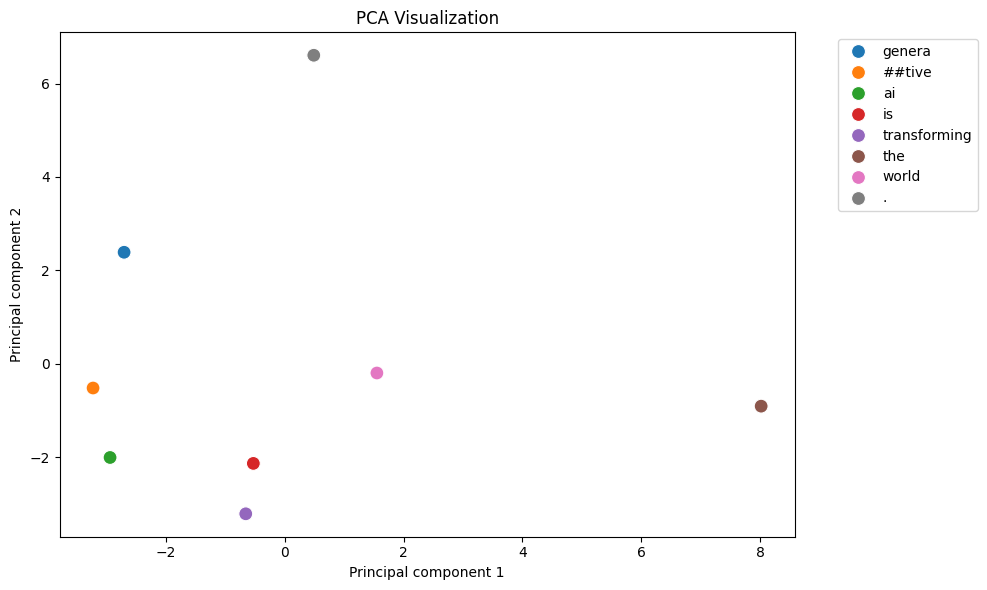

In [15]:
#Plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=reduced_df, hue='token', s=100, palette='tab10')
plt.title("PCA Visualization")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Each token as a point on a 2D plane
# Semantic spacing
# visual proof that embeddings capture 